In [18]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
features=[  2 ,  6 ,  5 ,  3  ,37  , 7 ,  8 , 59 ,  0 ,  9 , 10 , 11,  12 , 13,  42 , 44 ,  1 , 60,
  46  ,21  ,78,  45  ,80,  82  ,84,  86,  88  ,90  ,92,  23  ,71,  41 ,110  ,40, 108 , 39,
  62, 106  ,38 , 61  ,28 , 27 ,104 , 43 , 19 , 20 ,102 , 22 , 67 , 68, 100 , 24 , 25 ,109,
  65 , 66 ,107  ,35 , 36  ,29 , 30 ,105  ,77, 103, 101  ,76,  98  ,33  ,34,  93  ,91 , 73,
  99  ,64,  75  ,89,   4  ,47,  53  ,51]
prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "1Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price.iloc[:,features])
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price.iloc[:,features])

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  148.8200   148.920000    148.92000  148.9200  148.886667   
2017-07-17 21:45:00  148.5700   149.315000    149.31500  149.7100  149.330000   
2017-07-17 22:00:00  149.6808   149.747333    150.16100  150.6120  150.330933   
2017-07-17 22:15:00  150.4202   149.965500    150.61600  150.6200  150.646733   
2017-07-17 22:30:00  150.1700   150.298275    150.43555  150.2511  150.363700   
2017-07-17 22:45:00  149.9000   150.433275    150.25055  150.2500  150.167500   
2017-07-17 23:00:00  149.9800   150.280275    150.12500  150.0000  150.120000   
2017-07-17 23:15:00  149.8000   150.125275    150.00000  150.0000  149.973333   
2017-07-17 23:30:00  149.9350   150.080000    150.03500  150.0700  150.051667   
2017-07-17 23:45:00  149.7700   149.985800    149.97160  149.8732  149.932733   
2017-07-18 00:00:00  149.5400   149.884250    149.73350  149.5938  149.707933   
2017-07-18 00:15:00  149.520

                           low  close_4_sma  close_2_sma      close  \
2017-07-17 21:30:00  1004.4300  1004.990000   1004.99000  1004.9900   
2017-07-17 21:45:00  1003.8100  1008.264600   1008.26460  1011.5392   
2017-07-17 22:00:00  1011.4500  1009.923067   1012.38960  1013.2400   
2017-07-17 22:15:00  1012.3800  1010.748200   1013.23180  1013.2236   
2017-07-17 22:30:00  1009.1900  1012.003200   1011.61680  1010.0100   
2017-07-17 22:45:00  1008.0000  1011.518400   1009.80500  1009.6000   
2017-07-17 23:00:00  1007.0100  1010.030400   1008.44400  1007.2880   
2017-07-17 23:15:00  1005.1900  1008.399500   1006.99400  1006.7000   
2017-07-17 23:30:00  1006.6400  1008.335750   1008.22750  1009.7550   
2017-07-17 23:45:00  1009.0200  1008.460750   1009.92750  1010.1000   
2017-07-18 00:00:00  1008.2900  1008.721250   1009.21500  1008.3300   
2017-07-18 00:15:00  1008.2900  1009.715325   1009.50315  1010.6763   
2017-07-18 00:30:00  1010.1500  1010.011575   1010.80815  1010.9400   
2017-0

                           low  close_4_sma  close_2_sma      close  \
2017-07-17 21:30:00   976.3200   978.340000    978.34000   978.3400   
2017-07-17 21:45:00   978.6000   979.553400    979.55340   980.7668   
2017-07-17 22:00:00   979.2700   980.452533    981.50880   982.2508   
2017-07-17 22:15:00   980.7700   980.561900    981.57040   980.8900   
2017-07-17 22:30:00   979.8300   981.076900    980.64500   980.4000   
2017-07-17 22:45:00   975.2200   980.197700    978.82500   977.2500   
2017-07-17 23:00:00   975.0100   978.467500    976.29000   975.3300   
2017-07-17 23:15:00   973.6400   977.090250    975.35550   975.3810   
2017-07-17 23:30:00   975.4300   976.087750    975.88550   976.3900   
2017-07-17 23:45:00   974.5300   975.646500    975.93750   975.4850   
2017-07-18 00:00:00   974.6300   975.651500    975.41750   975.3500   
2017-07-18 00:15:00   975.5000   975.963750    975.99000   976.6300   
2017-07-18 00:30:00   976.3700   976.213750    977.01000   977.3900   
2017-0

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  72.800    72.900000     72.90000  72.9000  72.866667   
2017-07-17 21:45:00  72.720    72.900000     72.90000  72.9000  72.863333   
2017-07-17 22:00:00  72.820    72.882533     72.87380  72.8476  72.872533   
2017-07-17 22:15:00  72.840    72.931875     72.96375  73.0799  73.004967   
2017-07-17 22:30:00  72.995    72.961875     73.04995  73.0200  73.081667   
2017-07-17 22:45:00  72.900    72.989375     73.01500  73.0100  72.996667   
2017-07-17 23:00:00  72.950    73.024975     73.00000  72.9900  72.996667   
2017-07-17 23:15:00  72.840    72.996250     72.97750  72.9650  72.951667   
2017-07-17 23:30:00  72.940    72.990000     72.98000  72.9950  72.988333   
2017-07-17 23:45:00  72.895    72.968750     72.96000  72.9250  72.946667   
2017-07-18 00:00:00  72.880    72.966000     72.95200  72.9790  72.948000   
2017-07-18 00:15:00  72.870    72.996000     73.03200  73.0850  73.015000   

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  160.2300   160.270000    160.27000  160.2700  160.266667   
2017-07-17 21:45:00  160.1000   160.360000    160.36000  160.4500  160.380000   
2017-07-17 22:00:00  160.3700   160.404600    160.47190  160.4938  160.537933   
2017-07-17 22:15:00  160.2900   160.377700    160.39540  160.2970  160.455667   
2017-07-17 22:30:00  159.7600   160.277700    160.08350  159.8700  159.986667   
2017-07-17 22:45:00  159.2100   160.035200    159.67500  159.4800  159.536667   
2017-07-17 23:00:00  158.9100   159.651750    159.22000  158.9600  159.116667   
2017-07-17 23:15:00  158.9000   159.345000    159.01500  159.0700  159.083333   
2017-07-17 23:30:00  159.0400   159.197075    159.17415  159.2783  159.307767   
2017-07-17 23:45:00  159.0400   159.132075    159.24915  159.2200  159.210000   
2017-07-18 00:00:00  159.1700   159.198325    159.22250  159.2250  159.281667   
2017-07-18 00:15:00  159.130

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  34.6500    34.660000     34.66000  34.6600  34.683333   
2017-07-17 21:45:00  34.5300    34.610000     34.61000  34.5600  34.610000   
2017-07-17 22:00:00  34.4400    34.591667     34.55750  34.5550  34.528333   
2017-07-17 22:15:00  34.5000    34.598750     34.58750  34.6200  34.580000   
2017-07-17 22:30:00  34.5500    34.571250     34.58500  34.5500  34.573333   
2017-07-17 22:45:00  34.4500    34.556250     34.52500  34.5000  34.505000   
2017-07-17 23:00:00  34.4200    34.530000     34.47500  34.4500  34.463333   
2017-07-17 23:15:00  34.3600    34.470025     34.41505  34.3801  34.398367   
2017-07-17 23:30:00  34.3800    34.437525     34.40005  34.4200  34.408333   
2017-07-17 23:45:00  34.3700    34.411275     34.40750  34.3950  34.395000   
2017-07-18 00:00:00  34.3800    34.411275     34.42250  34.4500  34.426667   
2017-07-18 00:15:00  34.4300    34.431250     34.45500  34.4600 

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  31.500    31.515000     31.51500  31.5150  31.511667   
2017-07-17 21:45:00  31.450    31.520000     31.52000  31.5250  31.505000   
2017-07-17 22:00:00  31.510    31.550000     31.56750  31.6100  31.576667   
2017-07-17 22:15:00  31.530    31.562500     31.60500  31.6000  31.580000   
2017-07-17 22:30:00  31.580    31.583750     31.60000  31.6000  31.596667   
2017-07-17 22:45:00  31.590    31.607500     31.61000  31.6200  31.615000   
2017-07-17 23:00:00  31.570    31.598750     31.59750  31.5750  31.591667   
2017-07-17 23:15:00  31.540    31.585000     31.56000  31.5450  31.558333   
2017-07-17 23:30:00  31.535    31.573875     31.55025  31.5555  31.550167   
2017-07-17 23:45:00  31.500    31.545125     31.53025  31.5050  31.525000   
2017-07-18 00:00:00  31.480    31.535125     31.52000  31.5350  31.518333   
2017-07-18 00:15:00  31.530    31.537625     31.54500  31.5550  31.555000   

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  39.1200    39.190000     39.19000  39.1900  39.166667   
2017-07-17 21:45:00  39.0942    39.175000     39.17500  39.1600  39.171400   
2017-07-17 22:00:00  39.1500    39.173333     39.16500  39.1700  39.183333   
2017-07-17 22:15:00  39.1600    39.182500     39.19000  39.2100  39.213300   
2017-07-17 22:30:00  39.1500    39.175000     39.18500  39.1600  39.185000   
2017-07-17 22:45:00  39.0600    39.176250     39.16250  39.1650  39.133333   
2017-07-17 23:00:00  39.0950    39.162500     39.14000  39.1150  39.128333   
2017-07-17 23:15:00  39.0900    39.140000     39.11750  39.1200  39.120000   
2017-07-17 23:30:00  39.1100    39.145000     39.15000  39.1800  39.156667   
2017-07-17 23:45:00  39.1400    39.141250     39.16500  39.1500  39.166667   
2017-07-18 00:00:00  39.1500    39.160000     39.17000  39.1900  39.186667   
2017-07-18 00:15:00  39.1801    39.180000     39.19500  39.2000 

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  166.2900   166.380000    166.38000  166.3800  166.356667   
2017-07-17 21:45:00  165.6000   166.402700    166.40270  166.4254  166.508467   
2017-07-17 22:00:00  165.0400   166.248467    166.18270  165.9400  165.960000   
2017-07-17 22:15:00  163.3000   165.701350    165.00000  164.0600  164.483333   
2017-07-17 22:30:00  163.1000   164.996350    163.81000  163.5600  163.716667   
2017-07-17 22:45:00  161.7500   163.987500    162.97500  162.3900  162.593333   
2017-07-17 23:00:00  162.3500   163.327500    162.84500  163.3000  163.170000   
2017-07-17 23:15:00  162.6400   163.125000    163.27500  163.2500  163.150000   
2017-07-17 23:30:00  162.6800   163.000775    163.15655  163.0631  163.131033   
2017-07-17 23:45:00  162.4300   163.115775    162.95655  162.8500  162.810000   
2017-07-18 00:00:00  162.6600   163.144525    163.13250  163.4150  163.214967   
2017-07-18 00:15:00  163.040

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  162.9100   162.920000    162.92000  162.9200  162.950000   
2017-07-17 21:45:00  162.0300   162.782500    162.78250  162.6450  162.741667   
2017-07-17 22:00:00  162.1100   162.778333    162.70750  162.7700  162.621000   
2017-07-17 22:15:00  161.5100   162.486250    162.19000  161.6100  162.103333   
2017-07-17 22:30:00  161.1600   162.073750    161.44000  161.2700  161.500167   
2017-07-17 22:45:00  160.2500   161.772500    161.35500  161.4400  161.060000   
2017-07-17 23:00:00  160.9610   161.478750    161.51750  161.5950  161.518667   
2017-07-17 23:15:00  160.7400   161.337675    161.32035  161.0457  161.115233   
2017-07-17 23:30:00  160.5100   161.165175    160.81285  160.5800  160.733333   
2017-07-17 23:45:00  160.0201   160.869925    160.41950  160.2590  160.356367   
2017-07-18 00:00:00  160.1600   160.604175    160.39550  160.5320  160.510667   
2017-07-18 00:15:00  160.430

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  146.1600   146.160000    146.16000  146.1600  146.160000   
2017-07-17 21:45:00  145.5900   145.927500    145.92750  145.6950  145.925000   
2017-07-17 22:00:00  145.6000   145.831667    145.66750  145.6400  145.750000   
2017-07-17 22:15:00  145.4800   145.758750    145.59000  145.5400  145.616667   
2017-07-17 22:30:00  145.5200   145.681250    145.69500  145.8500  145.850000   
2017-07-17 22:45:00  145.3900   145.657500    145.72500  145.6000  145.623333   
2017-07-17 23:00:00  145.4700   145.672500    145.65000  145.7000  145.643333   
2017-07-17 23:15:00  145.4100   145.680000    145.63500  145.5700  145.586667   
2017-07-17 23:30:00  145.5700   145.657500    145.66500  145.7600  145.713333   
2017-07-17 23:45:00  145.5600   145.649200    145.66340  145.5668  145.652267   
2017-07-18 00:00:00  145.4200   145.626700    145.58840  145.6100  145.598333   
2017-07-18 00:15:00  145.580

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  176.8400   176.840000    176.84000  176.8400  176.840000   
2017-07-17 21:45:00  176.6800   177.235000    177.23500  177.6300  177.313333   
2017-07-17 22:00:00  177.6275   177.443333    177.74500  177.8600  177.852500   
2017-07-17 22:15:00  177.5900   177.565000    177.89500  177.9300  177.853333   
2017-07-17 22:30:00  177.5100   177.825000    177.90500  177.8800  177.803333   
2017-07-17 22:45:00  177.7057   177.887500    177.88000  177.8800  177.958567   
2017-07-17 23:00:00  177.7600   177.935000    177.96500  178.0500  178.040000   
2017-07-17 23:15:00  177.9800   178.026250    178.17250  178.2950  178.198333   
2017-07-17 23:30:00  178.2300   178.236250    178.50750  178.7200  178.576667   
2017-07-17 23:45:00  178.5900   178.433750    178.69500  178.6700  178.670000   
2017-07-18 00:00:00  178.6000   178.596250    178.68500  178.7000  178.685000   
2017-07-18 00:15:00  178.650

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00   81.8100    82.000000     82.00000   82.0000   81.936667   
2017-07-17 21:45:00   81.4800    81.810000     81.81000   81.6200   81.690000   
2017-07-17 22:00:00   81.5450    81.748333     81.62250   81.6250   81.623333   
2017-07-17 22:15:00   81.5400    81.746250     81.68250   81.7400   81.673333   
2017-07-17 22:30:00   81.7350    81.713750     81.80500   81.8700   81.861667   
2017-07-17 22:45:00   81.6200    81.716250     81.75000   81.6300   81.716667   
2017-07-17 23:00:00   81.6000    81.730000     81.65500   81.6800   81.673333   
2017-07-17 23:15:00   81.5100    81.702500     81.65500   81.6300   81.616667   
2017-07-17 23:30:00   81.6300    81.660000     81.66500   81.7000   81.703333   
2017-07-17 23:45:00   81.5800    81.650000     81.64500   81.5900   81.630000   
2017-07-18 00:00:00   81.5600    81.652500     81.64000   81.6900   81.673333   
2017-07-18 00:15:00   81.660

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  250.7900   250.790000    250.79000  250.7900  250.860000   
2017-07-17 21:45:00  250.7100   251.125000    251.12500  251.4600  251.510000   
2017-07-17 22:00:00  251.1000   251.243333    251.47000  251.4800  251.526667   
2017-07-17 22:15:00  250.9300   251.272500    251.42000  251.3600  251.293333   
2017-07-17 22:30:00  251.0300   251.347500    251.22500  251.0900  251.243333   
2017-07-17 22:45:00  250.2900   251.120000    250.82000  250.5500  250.693367   
2017-07-17 23:00:00  250.0000   250.869975    250.51495  250.4799  250.523300   
2017-07-17 23:15:00  250.0550   250.603725    250.38745  250.2950  250.386667   
2017-07-17 23:30:00  249.8100   250.293725    250.07250  249.8500  250.090000   
2017-07-17 23:45:00  249.6600   250.101225    249.81500  249.7800  249.840000   
2017-07-18 00:00:00  249.7000   250.068750    250.06500  250.3500  250.236667   
2017-07-18 00:15:00  249.890

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  57.530    57.530000     57.53000  57.5300  57.530000   
2017-07-17 21:45:00  57.100    57.435000     57.43500  57.3400  57.340000   
2017-07-17 22:00:00  57.150    57.373333     57.29500  57.2500  57.276667   
2017-07-17 22:15:00  57.150    57.317500     57.20000  57.1500  57.230000   
2017-07-17 22:30:00  57.130    57.272500     57.25000  57.3500  57.315000   
2017-07-17 22:45:00  57.150    57.260000     57.32000  57.2900  57.280000   
2017-07-17 23:00:00  57.205    57.270000     57.29000  57.2900  57.288333   
2017-07-17 23:15:00  57.110    57.278750     57.23750  57.1850  57.221667   
2017-07-17 23:30:00  57.080    57.223750     57.15750  57.1300  57.136667   
2017-07-17 23:45:00  57.020    57.178750     57.12000  57.1100  57.100000   
2017-07-18 00:00:00  57.085    57.144000     57.13050  57.1510  57.145667   
2017-07-18 00:15:00  57.160    57.150275     57.18055  57.2101  57.203367   

                        low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  70.580    70.610000      70.6100  70.6100  70.600000   
2017-07-17 21:45:00  70.400    70.775000      70.7750  70.9400  70.766667   
2017-07-17 22:00:00  70.900    70.896667      71.0400  71.1400  71.086667   
2017-07-17 22:15:00  71.130    70.985000      71.1950  71.2500  71.213333   
2017-07-17 22:30:00  71.135    71.145000      71.2500  71.2500  71.215000   
2017-07-17 22:45:00  71.230    71.246250      71.2975  71.3450  71.311667   
2017-07-17 23:00:00  71.285    71.313750      71.3775  71.4100  71.381667   
2017-07-17 23:15:00  71.410    71.386250      71.4750  71.5400  71.553333   
2017-07-17 23:30:00  71.440    71.483750      71.5900  71.6400  71.586667   
2017-07-17 23:45:00  71.590    71.572500      71.6700  71.7000  71.693333   
2017-07-18 00:00:00  71.685    71.655000      71.7200  71.7400  71.728333   
2017-07-18 00:15:00  71.691    71.730000      71.7900  71.8400  71.793667   

                          low  close_4_sma  close_2_sma     close      middle  \
2017-07-17 21:30:00  152.9700   152.970000    152.97000  152.9700  152.980000   
2017-07-17 21:45:00  153.0000   153.090000    153.09000  153.2100  153.216667   
2017-07-17 22:00:00  152.8100   153.033333    153.06500  152.9200  152.986667   
2017-07-17 22:15:00  152.8800   153.050000    153.01000  153.1000  153.051667   
2017-07-17 22:30:00  152.9300   153.052500    153.04000  152.9800  153.020000   
2017-07-17 22:45:00  152.7900   153.061250    153.11250  153.2450  153.103333   
2017-07-17 23:00:00  153.0600   153.118750    153.19750  153.1500  153.153333   
2017-07-17 23:15:00  153.0300   153.128750    153.14500  153.1400  153.110000   
2017-07-17 23:30:00  152.9500   153.156250    153.11500  153.0900  153.056667   
2017-07-17 23:45:00  152.9700   153.092500    153.04000  152.9900  153.026667   
2017-07-18 00:00:00  152.5200   152.995000    152.87500  152.7600  152.758333   
2017-07-18 00:15:00  152.710

                         low  close_4_sma  close_2_sma    close     middle  \
2017-07-17 21:30:00  56.7200    56.790000     56.79000  56.7900  56.773333   
2017-07-17 21:45:00  56.6000    56.780000     56.78000  56.7700  56.730000   
2017-07-17 22:00:00  56.7650    56.802333     56.80850  56.8470  56.829667   
2017-07-17 22:15:00  56.8000    56.821750     56.86350  56.8800  56.866667   
2017-07-17 22:30:00  56.7100    56.801750     56.79500  56.7100  56.768133   
2017-07-17 22:45:00  56.5850    56.766750     56.67000  56.6300  56.645000   
2017-07-17 23:00:00  56.5500    56.701250     56.60750  56.5850  56.601667   
2017-07-17 23:15:00  56.4500    56.626250     56.58250  56.5800  56.543333   
2017-07-17 23:30:00  56.5200    56.608750     56.61000  56.6400  56.613333   
2017-07-17 23:45:00  56.5150    56.581250     56.58000  56.5200  56.571667   
2017-07-18 00:00:00  56.4663    56.552500     56.49500  56.4700  56.492100   
2017-07-18 00:15:00  56.4700    56.555000     56.53000  56.5900 

In [ ]:
low                145.440000
close_4_sma        145.500000
close_2_sma        145.500000
close              145.500000
middle             145.520000
close_6_sma        145.500000
close_8_sma        145.500000
close_12_ema       145.500000
open               145.500000
close_10_sma       145.500000
close_12_sma       145.500000
close_14_sma       145.500000
close_16_sma       145.500000
close_18_sma       145.500000
close_20_sma       145.500000
boll               145.500000
high               145.620000
close_26_ema       145.500000
boll_lb                   NaN
close_-1_s                NaN
close_-2_s                NaN
boll_ub                   NaN
close_-4_s                NaN
close_-6_s                NaN
close_-8_s                NaN
close_-10_s               NaN
close_-12_s               NaN
close_-14_s               NaN
close_-16_s               NaN
atr_14                    NaN
                    ...      
rsi_6                     NaN
pdi_14                    NaN
pdi                       NaN
rs_16                     NaN
kdjk_9              44.444444
kdjk                44.444444
rs_14                     NaN
adx_6_ema                 NaN
adxr                      NaN
mdi_14                    NaN
mdi                       NaN
rs_12                     NaN
wr_14               66.666667
rs_10                     NaN
rs_8                      NaN
wr_12               66.666667
rsi_4                     NaN
dx_6_ema                  NaN
adx                       NaN
close_-16_d               NaN
close_-14_d               NaN
wr_10               66.666667
rs_6                      NaN
rsv_9               33.333333
wr_8                66.666667
close_-12_d               NaN
volume          206611.000000
volume_-2_s               NaN
volume_-8_s               NaN
volume_-6_s               NaN
Name: 2017-07-13 21:30:00, Length: 80, dtype: float64

In [19]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 1
[[244 312]
 [274 335]]
F1,score 0.5334394904458599
Accuracy: 0.49699570815450644
10000.0
Window: 5
[[291 260]
 [294 319]]
F1,score 0.5352348993288591
Accuracy: 0.5240549828178694
19.306977288832496
Window: 25
[[338 171]
 [463 188]]
F1,score 0.3722772277227722
Accuracy: 0.453448275862069
372.7593720314938
Window: 40
[[269 208]
 [396 284]]
F1,score 0.484641638225256
Accuracy: 0.47796024200518583
0.3593813663804626
Window: 80
[[438  25]
 [609  77]]
F1,score 0.19543147208121828
Accuracy: 0.4482158398607485
138.94954943731375
Window: 115
[[376  80]
 [206 480]]
F1,score 0.7704654895666131
Accuracy: 0.7495621716287215
1291.5496650148827
Window: 145
[[326 135]
 [182 493]]
F1,score 0.7567152724481964
Accuracy: 0.7209507042253521
4.39397056076079
Window: 170
[[392  56]
 [230 453]]
F1,score 0.7600671140939598
Accuracy: 0.7471264367816092
7.196856730011519
Window: 200
[[385  63]
 [186 491]]
F1,score 0.7977254264825345
Accuracy: 0.7786666666666666
10000.0
Window: 250
[[326 118]
 [

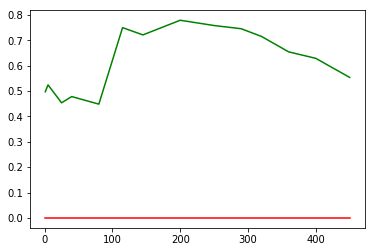

Working on... AMZN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


4.39397056076079
Window: 1
[[368 210]
 [335 252]]
F1,score 0.4804575786463298
Accuracy: 0.5321888412017167
4.39397056076079
Window: 5
[[404 165]
 [378 217]]
F1,score 0.4442169907881269
Accuracy: 0.5335051546391752
0.005994842503189409
Window: 25
[[291 250]
 [327 292]]
F1,score 0.5030146425495262
Accuracy: 0.5025862068965518
21.54434690031882
Window: 40
[[223 327]
 [182 425]]
F1,score 0.6254598969830758
Accuracy: 0.5600691443388073
31.622776601683793
Window: 80
[[250 231]
 [273 395]]
F1,score 0.6105100463678516
Accuracy: 0.5613577023498695
166.81005372000558
Window: 115
[[372  99]
 [382 289]]
F1,score 0.5457979225684608
Accuracy: 0.5788091068301225
10000.0
Window: 145
[[340  92]
 [261 443]]
F1,score 0.715092816787732
Accuracy: 0.6892605633802817
610.5402296585327
Window: 170
[[300 145]
 [270 416]]
F1,score 0.6672012830793905
Accuracy: 0.6330680813439434
227.58459260747887
Window: 200
[[276 162]
 [198 489]]
F1,score 0.7309417040358744
Accuracy: 0.68
138.94954943731375
Window: 250
[[142 2

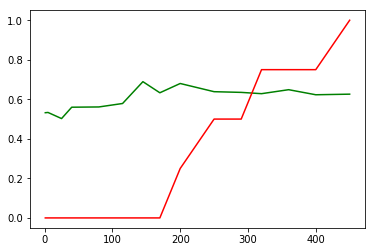

Working on... GOOGL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.0001
Window: 1
[[441 119]
 [451 154]]
F1,score 0.35079726651480636
Accuracy: 0.5107296137339056
2.6826957952797255
Window: 5
[[219 360]
 [245 340]]
F1,score 0.5291828793774319
Accuracy: 0.4802405498281787
7.196856730011519
Window: 25
[[315 226]
 [402 217]]
F1,score 0.4086629001883239
Accuracy: 0.4586206896551724
138.94954943731375
Window: 40
[[183 356]
 [150 468]]
F1,score 0.6490984743411927
Accuracy: 0.5626620570440796
372.7593720314938
Window: 80
[[145 388]
 [101 515]]
F1,score 0.6780776826859776
Accuracy: 0.5744125326370757
10000.0
Window: 115
[[131 426]
 [ 58 527]]
F1,score 0.6853055916775032
Accuracy: 0.5761821366024519
1291.5496650148827
Window: 145
[[108 439]
 [ 16 573]]
F1,score 0.7158026233603997
Accuracy: 0.5994718309859155
10000.0
Window: 170
[[113 429]
 [ 31 558]]
F1,score 0.7081218274111676
Accuracy: 0.5932802829354553
610.5402296585327
Window: 200
[[131 408]
 [ 35 551]]
F1,score 0.7132686084142394
Accuracy: 0.6062222222222222
1.637893706954064
Window: 250
[[226 295]
 [1

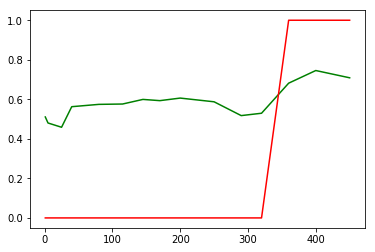

Working on... MSFT
1291.5496650148827
Window: 1
[[399 164]
 [403 199]]
F1,score 0.41243523316062175
Accuracy: 0.5133047210300429
227.58459260747887
Window: 5
[[333 202]
 [352 277]]
F1,score 0.5
Accuracy: 0.5240549828178694
7.196856730011519
Window: 25
[[237 249]
 [265 409]]
F1,score 0.6141141141141142
Accuracy: 0.5568965517241379
2.6826957952797255
Window: 40
[[366 105]
 [387 299]]
F1,score 0.5486238532110091
Accuracy: 0.57476231633535
0.0001
Window: 80
[[300 150]
 [377 322]]
F1,score 0.5499573014517507
Accuracy: 0.5413402959094865
0.000774263682681127
Window: 115
[[373   0]
 [769   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.3266199649737303
0.046415888336127774
Window: 145
[[328  48]
 [568 192]]
F1,score 0.384
Accuracy: 0.45774647887323944
84.83428982440716
Window: 170
[[392  33]
 [539 167]]
F1,score 0.3686534216335541
Accuracy: 0.4942528735632184
1.0
Window: 200
[[370  39]
 [494 222]]
F1,score 0.4544524053224155
Accuracy: 0.5262222222222223
4.39397056076079
Window: 250
[[234 118]
 [409 354]]
F1,score 0.5732793522267207
Accuracy: 0.5273542600896861
0.3593813663804626
Window: 290
[[288  68]
 [490 261]]
F1,score 0.4833333333333333
Accuracy: 0.4959349593495935
1291.5496650148827
Window: 320
[[294  45]
 [424 338]]
F1,score 0.5903930131004367
Accuracy: 0.5740236148955495
10000.0
Window: 360
[[315  34]
 [392 352]]
F1,score 0.6230088495575221
Accuracy: 0.6102470265324794
0.005994842503189409
Window: 400
[[223  82]
 [516 264]]
F1,score 0.4689165186500889
Accuracy: 0.4488479262672811
0.005994842503189409
Window: 450
[[170  87]
 [537 281]]
F1,score 0.4738617200674536
Accuracy: 0.41953488372

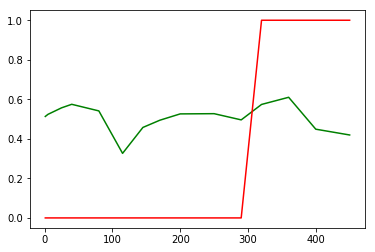

Working on... FB


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.0001
Window: 1
[[361 217]
 [343 244]]
F1,score 0.46564885496183206
Accuracy: 0.51931330472103
7.196856730011519
Window: 5
[[263 312]
 [227 362]]
F1,score 0.5732383214568488
Accuracy: 0.5369415807560137
372.7593720314938
Window: 25
[[194 340]
 [205 421]]
F1,score 0.6070656092285509
Accuracy: 0.5301724137931034
31.622776601683793
Window: 40
[[163 349]
 [217 428]]
F1,score 0.6019690576652602
Accuracy: 0.5108038029386344
2.6826957952797255
Window: 80
[[130 251]
 [236 532]]
F1,score 0.6860090264345583
Accuracy: 0.5761531766753699
1.637893706954064
Window: 115
[[111 232]
 [218 581]]
F1,score 0.7208436724565757
Accuracy: 0.6059544658493871
1.637893706954064
Window: 145
[[ 99 247]
 [179 611]]
F1,score 0.7415048543689321
Accuracy: 0.625
166.81005372000558
Window: 170
[[ 87 228]
 [124 692]]
F1,score 0.7972350230414746
Accuracy: 0.6887709991158267
1.0
Window: 200
[[103 203]
 [147 672]]
F1,score 0.7933884297520661
Accuracy: 0.6888888888888889
1.0
Window: 250
[[102 178]
 [197 638]]
F1,score 0.772

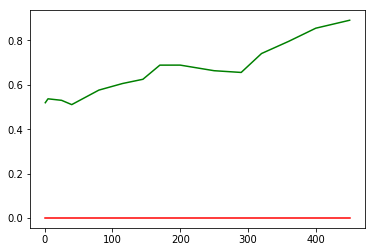

Working on... INTC
2.6826957952797255
Window: 1
[[545  10]
 [601   9]]
F1,score 0.028616852146263912
Accuracy: 0.4755364806866953
610.5402296585327
Window: 5
[[471  69]
 [528  96]]
F1,score 0.24334600760456274
Accuracy: 0.48711340206185566
1.637893706954064
Window: 25
[[453   2]
 [684  21]]
F1,score 0.05769230769230769
Accuracy: 0.4086206896551724
610.5402296585327
Window: 40
[[420  26]
 [642  69]]
F1,score 0.17121588089330023
Accuracy: 0.4226447709593777
0.3593813663804626
Window: 80
[[453   0]
 [696   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.39425587467362927
1.0
Window: 115
[[428   0]
 [712   2]]
F1,score 0.00558659217877095
Accuracy: 0.37653239929947463
1.637893706954064
Window: 145
[[443   0]
 [680  13]]
F1,score 0.0368271954674221
Accuracy: 0.4014084507042254
0.0001
Window: 170
[[399  32]
 [673  27]]
F1,score 0.07114624505928853
Accuracy: 0.376657824933687
0.005994842503189409
Window: 200
[[412  20]
 [677  16]]
F1,score 0.0438957475994513
Accuracy: 0.3804444444444444
0.0001
Window: 250
[[364   5]
 [738   8]]
F1,score 0.021080368906455864
Accuracy: 0.33363228699551567
84.83428982440716
Window: 290
[[335   3]
 [556 213]]
F1,score 0.4324873096446701
Accuracy: 0.4950316169828365
51.7947467923121
Window: 320
[[314   1]
 [605 181]]
F1,score 0.37396694214876036
Accuracy: 0.44959128065395093
84.83428982440716
Window: 360
[[359   0]
 [543 191]]
F1,score 0.412972972972973
Accuracy: 0.5032021957913998
84.83428982440716
Window: 400
[[289   1]
 [623 172]]
F1,score 0.3553719008264463
Accuracy: 0.424884792626

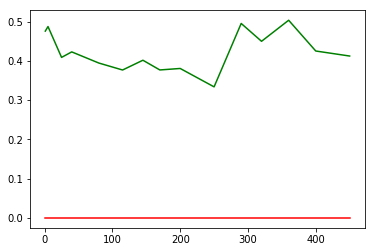

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1.0
Window: 1
[[407 156]
 [413 189]]
F1,score 0.3991552270327349
Accuracy: 0.511587982832618
10000.0
Window: 5
[[346 203]
 [389 226]]
F1,score 0.4329501915708812
Accuracy: 0.49140893470790376
2.6826957952797255
Window: 25
[[491  52]
 [533  84]]
F1,score 0.2231075697211155
Accuracy: 0.4956896551724138
11.787686347935873
Window: 40
[[404 146]
 [356 251]]
F1,score 0.5
Accuracy: 0.5661192739844425
2.782559402207126
Window: 80
[[507  27]
 [575  40]]
F1,score 0.11730205278592376
Accuracy: 0.4760661444734552
2.6826957952797255
Window: 115
[[448  82]
 [511 101]]
F1,score 0.2540880503144654
Accuracy: 0.4807355516637478
19.306977288832496
Window: 145
[[420 107]
 [278 331]]
F1,score 0.6322827125119389
Accuracy: 0.6610915492957746
2.6826957952797255
Window: 170
[[384 167]
 [226 354]]
F1,score 0.6430517711171662
Accuracy: 0.6525198938992043
1.0
Window: 200
[[299 213]
 [251 362]]
F1,score 0.6094276094276095
Accuracy: 0.5875555555555556
4.39397056076079
Window: 250
[[225 275]
 [131 484]]
F1,score 0.7

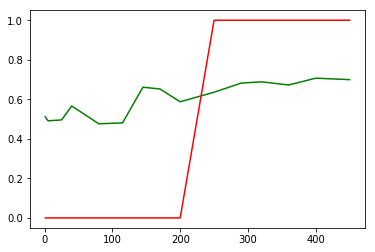

Working on... CMCSA
227.58459260747887
Window: 1
[[457 120]
 [456 132]]
F1,score 0.3142857142857143
Accuracy: 0.5055793991416309
11.787686347935873
Window: 5
[[486  90]
 [480 108]]
F1,score 0.2748091603053435
Accuracy: 0.5103092783505154
7.196856730011519
Window: 25
[[191 403]
 [189 377]]
F1,score 0.5601783060921248
Accuracy: 0.4896551724137931
84.83428982440716
Window: 40
[[320 273]
 [308 256]]
F1,score 0.4684354986276304
Accuracy: 0.4978392394122731
0.3593813663804626
Window: 80
[[129 476]
 [ 71 473]]
F1,score 0.6336235766912258
Accuracy: 0.5239338555265448
0.046415888336127774
Window: 115
[[ 77 511]
 [ 53 501]]
F1,score 0.6398467432950192
Accuracy: 0.5061295971978984
0.3593813663804626
Window: 145
[[ 93 498]
 [ 70 475]]
F1,score 0.6258234519104084
Accuracy: 0.5
1.0
Window: 170
[[ 61 608]
 [ 60 402]]
F1,score 0.546195652173913
Accuracy: 0.4093722369584439
1.0
Window: 200
[[ 58 612]
 [ 45 410]]
F1,score 0.5551794177386593
Accuracy: 0.416
0.3593813663804626
Window: 250
[[ 63 607]
 [ 27

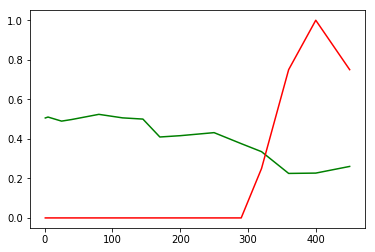

Working on... NVDA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.3593813663804626
Window: 1
[[411 149]
 [414 191]]
F1,score 0.4042328042328043
Accuracy: 0.5167381974248927
11.787686347935873
Window: 5
[[390 161]
 [376 237]]
F1,score 0.4688427299703264
Accuracy: 0.538659793814433
0.3593813663804626
Window: 25
[[450  55]
 [522 133]]
F1,score 0.31553973902728355
Accuracy: 0.5025862068965518
0.3593813663804626
Window: 40
[[506   5]
 [575  71]]
F1,score 0.19667590027700832
Accuracy: 0.49870354364736386
1.637893706954064
Window: 80
[[464  76]
 [453 156]]
F1,score 0.370986920332937
Accuracy: 0.5395996518711923
0.000774263682681127
Window: 115
[[605   8]
 [512  17]]
F1,score 0.06137184115523466
Accuracy: 0.5446584938704028
51.7947467923121
Window: 145
[[438 198]
 [ 87 413]]
F1,score 0.7434743474347434
Accuracy: 0.7491197183098591
0.005994842503189409
Window: 170
[[631   0]
 [500   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.5579133510167993
21.54434690031882
Window: 200
[[452 148]
 [ 87 438]]
F1,score 0.7884788478847884
Accuracy: 0.7911111111111111
10000.0
Window: 250
[[423 167]
 [140 385]]
F1,score 0.7149489322191271
Accuracy: 0.7246636771300449
0.005994842503189409
Window: 290
[[519  50]
 [346 192]]
F1,score 0.4923076923076923
Accuracy: 0.6422764227642277
10000.0
Window: 320
[[368 190]
 [231 312]]
F1,score 0.5971291866028708
Accuracy: 0.6176203451407811
227.58459260747887
Window: 360
[[379 113]
 [242 359]]
F1,score 0.6691519105312209
Accuracy: 0.6752058554437328
610.5402296585327
Window: 400
[[315 186]
 [223 361]]
F1,score 0.6383731211317417
Accuracy: 0.6230414746543779
1291.5496650148827
Window: 450
[[295 175]
 [202 403]]
F1,score 0.6813186813186812
Accuracy: 0.6493023255813953
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 50, 50, 0, 0, 25]
[0.5167381974248927, 0.538659793814433, 0.5025862068965518, 0.49870354364736386, 0.5395996518711923, 0.5446584938704028, 0.7491197183098591, 0.5579133510

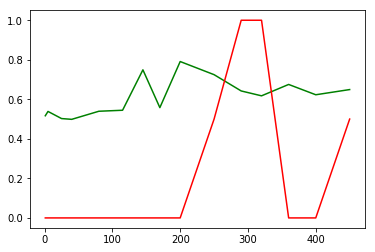

Working on... NFLX
0.000774263682681127
Window: 1
[[ 65 519]
 [ 79 502]]
F1,score 0.6267166042446942
Accuracy: 0.48669527896995707
10000.0
Window: 5
[[263 316]
 [282 303]]
F1,score 0.5033222591362126
Accuracy: 0.48625429553264604
372.7593720314938
Window: 25
[[334 200]
 [417 209]]
F1,score 0.4038647342995169
Accuracy: 0.4681034482758621
138.94954943731375
Window: 40
[[302 185]
 [426 244]]
F1,score 0.44404003639672424
Accuracy: 0.47191011235955055
1291.5496650148827
Window: 80
[[263 191]
 [403 292]]
F1,score 0.4957555178268252
Accuracy: 0.4830287206266319
227.58459260747887
Window: 115
[[328 111]
 [513 190]]
F1,score 0.3784860557768925
Accuracy: 0.45359019264448336
31.622776601683793
Window: 145
[[344  74]
 [457 261]]
F1,score 0.49572649572649574
Accuracy: 0.5325704225352113
31.622776601683793
Window: 170
[[351  75]
 [405 300]]
F1,score 0.5555555555555557
Accuracy: 0.5755968169761273
10000.0
Window: 200
[[355  98]
 [346 326]]
F1,score 0.5948905109489051
Accuracy: 0.6053333333333333
1000

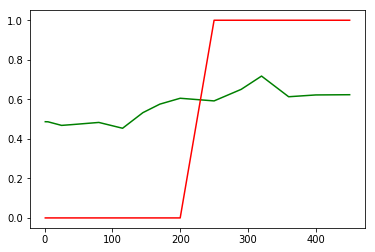

Working on... ADBE
2.782559402207126
Window: 1
[[329 210]
 [392 234]]
F1,score 0.43738317757009343
Accuracy: 0.4832618025751073
10000.0
Window: 5
[[302 219]
 [392 251]]
F1,score 0.45103324348607365
Accuracy: 0.47508591065292094
4.39397056076079
Window: 25
[[426  10]
 [708  16]]
F1,score 0.042666666666666665
Accuracy: 0.3810344827586207
1.0
Window: 40
[[347  81]
 [518 211]]
F1,score 0.4133202742409402
Accuracy: 0.4822817631806396
0.046415888336127774
Window: 80
[[133 279]
 [211 526]]
F1,score 0.6822308690012969
Accuracy: 0.5735422106179286
166.81005372000558
Window: 115
[[123 311]
 [153 555]]
F1,score 0.7052096569250317
Accuracy: 0.5936952714535902
1.637893706954064
Window: 145
[[ 52 371]
 [110 603]]
F1,score 0.7148784825133372
Accuracy: 0.5765845070422535
1.0
Window: 170
[[  1 462]
 [  1 667]]
F1,score 0.7423483583750696
Accuracy: 0.5906277630415562
4.39397056076079
Window: 200
[[ 97 382]
 [ 74 572]]
F1,score 0.715
Accuracy: 0.5946666666666667
2.6826957952797255
Window: 250
[[125 301]


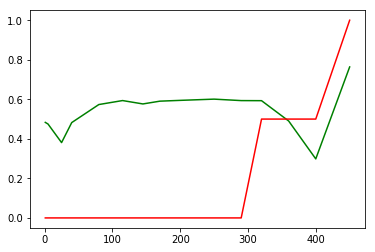

Working on... AMGN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


138.94954943731375
Window: 1
[[143 436]
 [165 421]]
F1,score 0.5835065835065835
Accuracy: 0.48412017167381977
84.83428982440716
Window: 5
[[ 84 496]
 [106 478]]
F1,score 0.613607188703466
Accuracy: 0.48281786941580757
21.54434690031882
Window: 25
[[ 40 490]
 [ 30 600]]
F1,score 0.6976744186046512
Accuracy: 0.5517241379310345
372.7593720314938
Window: 40
[[ 49 439]
 [ 34 635]]
F1,score 0.7286288009179573
Accuracy: 0.5911840968020743
11.787686347935873
Window: 80
[[ 64 423]
 [  8 654]]
F1,score 0.7521564117308799
Accuracy: 0.6248912097476066
1.0
Window: 115
[[ 93 347]
 [ 12 690]]
F1,score 0.7935595169637724
Accuracy: 0.6856392294220666
1.637893706954064
Window: 145
[[112 394]
 [  0 630]]
F1,score 0.7617896009673518
Accuracy: 0.653169014084507
1.0
Window: 170
[[108 386]
 [  0 637]]
F1,score 0.7674698795180723
Accuracy: 0.6587091069849691
0.3593813663804626
Window: 200
[[ 58 412]
 [  0 655]]
F1,score 0.7607433217189314
Accuracy: 0.6337777777777778
0.000774263682681127
Window: 250
[[160 368

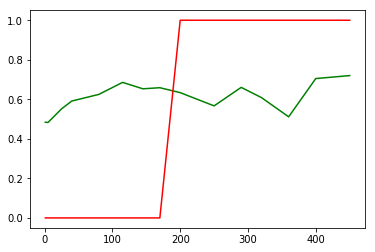

Working on... TXN
2.6826957952797255
Window: 1
[[257 319]
 [286 303]]
F1,score 0.500412881915772
Accuracy: 0.48068669527896996
2.6826957952797255
Window: 5
[[347 175]
 [391 251]]
F1,score 0.4700374531835206
Accuracy: 0.5137457044673539
10000.0
Window: 25
[[304 181]
 [440 235]]
F1,score 0.4307974335472044
Accuracy: 0.4646551724137931
2.6826957952797255
Window: 40
[[353 125]
 [540 139]]
F1,score 0.2948038176033934
Accuracy: 0.42523768366465
1000.0
Window: 80
[[228 225]
 [257 439]]
F1,score 0.6455882352941177
Accuracy: 0.5805047867711053
138.94954943731375
Window: 115
[[189 230]
 [212 511]]
F1,score 0.698087431693989
Accuracy: 0.6129597197898424
227.58459260747887
Window: 145
[[192 258]
 [102 584]]
F1,score 0.7643979057591622
Accuracy: 0.6830985915492958
1000.0
Window: 170
[[150 312]
 [131 538]]
F1,score 0.7083607636603028
Accuracy: 0.6083112290008842
610.5402296585327
Window: 200
[[171 309]
 [ 99 546]]
F1,score 0.728
Accuracy: 0.6373333333333333
138.94954943731375
Window: 250
[[160 342]


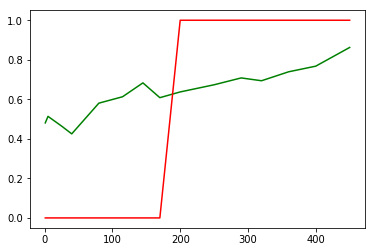

Working on... AVGO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.005994842503189409
Window: 1
[[348 240]
 [349 228]]
F1,score 0.43636363636363634
Accuracy: 0.4944206008583691
10000.0
Window: 5
[[191 379]
 [202 392]]
F1,score 0.5743589743589743
Accuracy: 0.5008591065292096
2.782559402207126
Window: 25
[[ 80 518]
 [ 70 492]]
F1,score 0.6259541984732824
Accuracy: 0.49310344827586206
2.6826957952797255
Window: 40
[[  8 545]
 [  0 604]]
F1,score 0.6891043924700514
Accuracy: 0.5289541918755402
10000.0
Window: 80
[[151 439]
 [ 76 483]]
F1,score 0.6522619851451722
Accuracy: 0.5517841601392516
1.637893706954064
Window: 115
[[  4 584]
 [  0 554]]
F1,score 0.6548463356973996
Accuracy: 0.4886164623467601
1.0
Window: 145
[[  5 601]
 [  0 530]]
F1,score 0.6381697772426249
Accuracy: 0.4709507042253521
1.0
Window: 170
[[ 22 573]
 [  0 536]]
F1,score 0.6516717325227963
Accuracy: 0.493368700265252
19.306977288832496
Window: 200
[[ 74 535]
 [  0 516]]
F1,score 0.6585832801531589
Accuracy: 0.5244444444444445
1.0
Window: 250
[[114 484]
 [ 15 502]]
F1,score 0.667997338

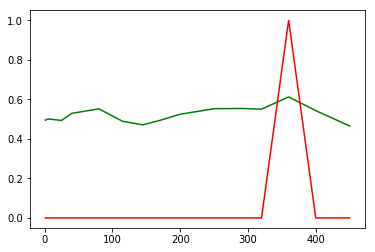

Working on... PYPL
0.0001
Window: 1
[[326 222]
 [329 288]]
F1,score 0.5110913930789707
Accuracy: 0.527038626609442
7.196856730011519
Window: 5
[[315 236]
 [330 283]]
F1,score 0.5
Accuracy: 0.5137457044673539
4.39397056076079
Window: 25
[[264 245]
 [346 305]]
F1,score 0.507910074937552
Accuracy: 0.49051724137931035
11.787686347935873
Window: 40
[[262 258]
 [307 330]]
F1,score 0.5387755102040815
Accuracy: 0.5116681071737251
1.637893706954064
Window: 80
[[389 205]
 [357 198]]
F1,score 0.4133611691022965
Accuracy: 0.5108790252393386
1.637893706954064
Window: 115
[[457  36]
 [599  50]]
F1,score 0.13605442176870747
Accuracy: 0.44395796847635727
10000.0
Window: 145
[[245 194]
 [304 393]]
F1,score 0.6121495327102803
Accuracy: 0.5616197183098591
10000.0
Window: 170
[[284 193]
 [280 374]]
F1,score 0.6126126126126126
Accuracy: 0.5817860300618921
0.046415888336127774
Window: 200
[[489   0]
 [636   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.43466666666666665
10000.0
Window: 250
[[336 193]
 [141 445]]
F1,score 0.7271241830065359
Accuracy: 0.7004484304932735
1291.5496650148827
Window: 290
[[324 240]
 [ 47 496]]
F1,score 0.7756059421422987
Accuracy: 0.7407407407407407
10000.0
Window: 320
[[433 161]
 [ 95 412]]
F1,score 0.7629629629629631
Accuracy: 0.7674841053587648
10000.0
Window: 360
[[457 178]
 [ 69 389]]
F1,score 0.7590243902439026
Accuracy: 0.7740164684354987
10000.0
Window: 400
[[433 181]
 [111 360]]
F1,score 0.7114624505928854
Accuracy: 0.7308755760368664
10000.0
Window: 450
[[559 146]
 [122 248]]
F1,score 0.6492146596858639
Accuracy: 0.7506976744186047
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25, 0, 25]
[0.527038626609442, 0.5137457044673539, 0.49051724137931035, 0.5116681071737251, 0.5108790252393386, 0.44395796847635727, 0.5616197183098591, 0.5817860300618921, 0.43466666666666665, 0.7004484304932735, 0.7407407407407407, 0.7674841053587648, 0.7740164684354987, 0.7308755760368664, 0.7506976744

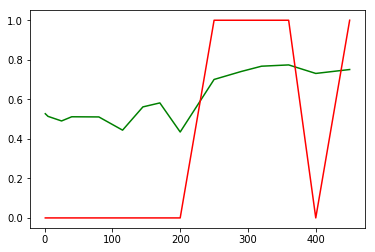

Working on... GILD


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.000774263682681127
Window: 1
[[370 218]
 [392 185]]
F1,score 0.37755102040816335
Accuracy: 0.47639484978540775
0.0001
Window: 5
[[277 307]
 [352 228]]
F1,score 0.40896860986547084
Accuracy: 0.4338487972508591
2.6826957952797255
Window: 25
[[  0 608]
 [  0 552]]
F1,score 0.6448598130841121
Accuracy: 0.47586206896551725
166.81005372000558
Window: 40
[[ 45 535]
 [ 59 518]]
F1,score 0.6355828220858896
Accuracy: 0.48660328435609335
0.3593813663804626
Window: 80
[[  3 565]
 [  1 580]]
F1,score 0.6720741599073001
Accuracy: 0.5073977371627503
0.3593813663804626
Window: 115
[[  0 622]
 [  0 520]]
F1,score 0.6257521058965102
Accuracy: 0.4553415061295972
1.0
Window: 145
[[ 16 628]
 [  0 492]]
F1,score 0.6104218362282878
Accuracy: 0.4471830985915493
0.3593813663804626
Window: 170
[[ 33 645]
 [  0 453]]
F1,score 0.5841392649903289
Accuracy: 0.4297082228116711
0.0001
Window: 200
[[641  49]
 [267 168]]
F1,score 0.5153374233128833
Accuracy: 0.7191111111111111
10000.0
Window: 250
[[231 512]
 [ 21 351

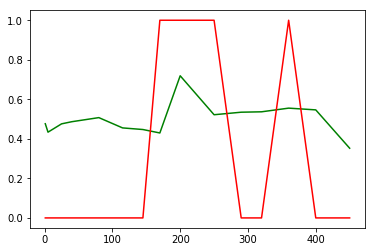

Working on... COST


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 1
[[348 220]
 [362 235]]
F1,score 0.4467680608365019
Accuracy: 0.5004291845493563
10000.0
Window: 5
[[323 227]
 [388 226]]
F1,score 0.4236176194939081
Accuracy: 0.47164948453608246
0.005994842503189409
Window: 25
[[340 162]
 [496 162]]
F1,score 0.329938900203666
Accuracy: 0.43275862068965515
10000.0
Window: 40
[[394 116]
 [483 164]]
F1,score 0.35382955771305286
Accuracy: 0.4822817631806396
10000.0
Window: 80
[[384  87]
 [463 215]]
F1,score 0.43877551020408156
Accuracy: 0.5213228894691035
1.0
Window: 115
[[446   0]
 [696   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.3905429071803853
0.3593813663804626
Window: 145
[[374   0]
 [762   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.32922535211267606
0.3593813663804626
Window: 170
[[365   0]
 [766   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.32272325375773653
166.81005372000558
Window: 200
[[320  21]
 [661 123]]
F1,score 0.2650862068965517
Accuracy: 0.3937777777777778
1.637893706954064
Window: 250
[[312   4]
 [736  63]]
F1,score 0.14549653579676675
Accuracy: 0.336322869955157
0.3593813663804626
Window: 290
[[330   0]
 [777   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.2981029810298103
31.622776601683793
Window: 320
[[312   0]
 [776  13]]
F1,score 0.032418952618453865
Accuracy: 0.29518619436875565
10000.0
Window: 360
[[215  60]
 [709 109]]
F1,score 0.220871327254306
Accuracy: 0.29643183897529735
10000.0
Window: 400
[[187  37]
 [757 104]]
F1,score 0.20758483033932137
Accuracy: 0.26820276497695855
31.622776601683793
Window: 450
[[254  17]
 [774  30]]
F1,score 0.07050528789659223
Accuracy: 0.2641860465116279
[0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25, 50, 50, 50]
[0.5004291845493563, 0.47164948453608246, 0.43275862068965515, 0.4822817631806396, 0.5213228894691035, 0.3905429071803853, 0.32922535211267606, 0.32272325375773653, 0.3937777777777778, 0.336322869955157, 0.2981029810298103, 0.29518619436875565, 0.29643183897529735, 0.26820276497695855, 0.2641860465116279]
accuracy
accuracy


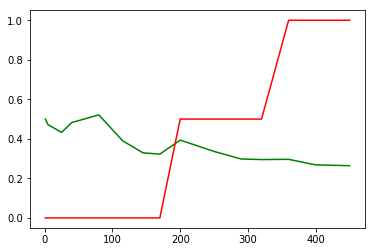

Working on... QCOM
1.0
Window: 1
[[296 280]
 [270 319]]
F1,score 0.537037037037037
Accuracy: 0.5278969957081545
138.94954943731375
Window: 5
[[232 311]
 [220 401]]
F1,score 0.6016504126031508
Accuracy: 0.5438144329896907
10000.0
Window: 25
[[100 402]
 [123 535]]
F1,score 0.6708463949843261
Accuracy: 0.5474137931034483
84.83428982440716
Window: 40
[[ 62 450]
 [116 529]]
F1,score 0.6514778325123153
Accuracy: 0.5108038029386344
7.196856730011519
Window: 80
[[  5 434]
 [ 17 693]]
F1,score 0.7544910179640718
Accuracy: 0.6074847693646649
4.39397056076079
Window: 115
[[  5 431]
 [  0 706]]
F1,score 0.7661421595225175
Accuracy: 0.6225919439579685
11.787686347935873
Window: 145
[[ 23 433]
 [ 48 632]]
F1,score 0.7243553008595989
Accuracy: 0.5765845070422535
0.0001
Window: 170
[[103 398]
 [205 425]]
F1,score 0.5849965588437716
Accuracy: 0.46684350132625996
0.0001
Window: 200
[[165 378]
 [218 364]]
F1,score 0.5498489425981874
Accuracy: 0.4702222222222222
0.046415888336127774
Window: 250
[[226 362]

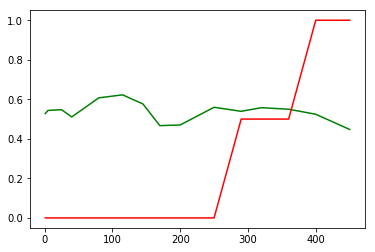

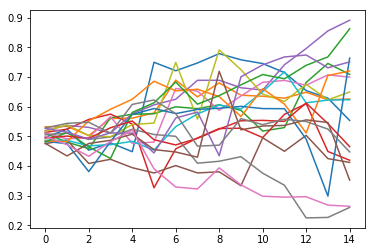

In [20]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
inbalancinglist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    inbalance=[]
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[1,5,25,40,80,115,145,170,200,250,290,320,360,400,450]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm
        inbalance.append(totu)
        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    inbalancinglist.append(inbalance)
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [16]:
tempacc=f1scoreresults
tempbalance=inbalancinglist

[0.43533234 0.45067985 0.51969861 0.53535    0.47806082 0.50707142
 0.52475761 0.48354004 0.56686562 0.60183401 0.6059628  0.60305263
 0.57957846 0.5360304  0.56382742]
[ 0.          0.          0.          0.          0.          0.
  1.38888889  2.77777778  8.33333333 16.66666667 18.05555556 23.61111111
 29.16666667 37.5        36.11111111]


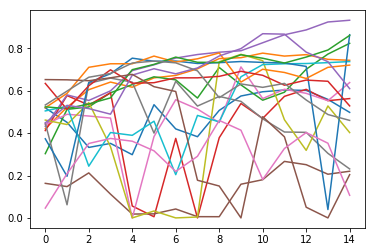

In [17]:
import operator
t=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    b=np.add(b,tempbalance[i])
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
print(b/len(tempbalance))
plt.show()

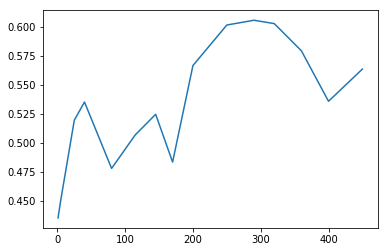

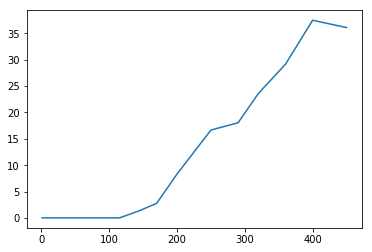

In [13]:
plt.plot(trendwindowtime,t/len(tempacc))
#normalized=normalize((b/len(tempbalance)).reshape(1, -1),axis=0,norm='max')

plt.show()
plt.plot(trendwindowtime,b/len(tempbalance))
plt.show()